# **Basic Info.**

In [ ]:
# Import libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sales_df = pd.read_csv('/content/sales_data_large (1).csv')

sales_df

,Year,Month,Category,Product,Units Sold,Revenue
0,2023,1,Clothing,Jeans,163,28813.27
1,2023,1,Books,Science,417,22350.09
2,2023,1,Home & Kitchen,Blender,492,237710.33
3,2023,1,Sports,Cricket Bat,227,19669.76
4,2023,1,Clothing,Shoes,145,28035.42
...,...,...,...,...,...,...
2395,2024,12,Sports,Football,229,17398.07
2396,2024,12,Books,Biography,31,686.92
2397,2024,12,Clothing,Jacket,383,113919.64
2398,2024,12,Home & Kitchen,Furniture,89,25005.97


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        2400 non-null   int64  
 1   Month       2400 non-null   int64  
 2   Category    2400 non-null   object 
 3   Product     2400 non-null   object 
 4   Units Sold  2400 non-null   int64  
 5   Revenue     2400 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 112.6+ KB


In [ ]:
sales_df.describe()

,Year,Month,Units Sold,Revenue
count,2400.000000,2400.000000,2400.000000,2400.000000
mean,2023.500000,6.500000,249.624583,63203.776708
std,0.500104,3.452772,141.918609,55518.041743
min,2023.000000,1.000000,10.000000,249.160000
25%,2023.000000,3.750000,126.000000,17220.692500
50%,2023.500000,6.500000,252.000000,46406.370000
75%,2024.000000,9.250000,373.000000,96448.955000
max,2024.000000,12.000000,500.000000,246999.530000


In [ ]:
sales_df.describe(include='object')

,Category,Product
count,2400,2400
unique,7,35
top,Books,Science
freq,368,82


In [ ]:
sales_df.isnull().sum()

,0
Year,0
Month,0
Category,0
Product,0
Units Sold,0
Revenue,0


In [ ]:
sales_df.duplicated().sum()

0

In [ ]:
sales_df.nunique()

,0
Year,2
Month,12
Category,7
Product,35
Units Sold,486
Revenue,2400


In [ ]:
sales_df['Category'].unique()

array(['Clothing', 'Books', 'Home & Kitchen', 'Sports', 'Toys',
       'Beauty & Personal Care', 'Electronics'], dtype=object)

In [ ]:
sales_df['Product'].unique()

array(['Jeans', 'Science', 'Blender', 'Cricket Bat', 'Shoes',
       'Action Figure', 'Comics', 'Shampoo', 'Doll', 'Air Purifier',
       'Puzzle', 'Smartwatch', 'Cookware', 'Vacuum Cleaner', 'Headphones',
       'Football', 'Camera', 'T-Shirt', 'Jacket', 'Laptop', 'Remote Car',
       'Yoga Mat', 'Body Wash', 'Dumbbells', 'Biography', 'Smartphone',
       'Perfume', 'Board Game', 'Furniture', 'Hat', 'Tennis Racket',
       'Non-Fiction', 'Fiction', 'Face Cream', 'Lipstick'], dtype=object)

# **Monthly and yearly sales growth**

In [ ]:
# Calculated monthly sales growth
monthly_revenue = sales_df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()
monthly_revenue['MonthlyGrowth'] = monthly_revenue['Revenue'].pct_change()

monthly_revenue[['Year', 'Month', 'Revenue', 'MonthlyGrowth']]

,Year,Month,Revenue,MonthlyGrowth
0,2023,1,6007400.24,NaN
1,2023,2,5406186.31,-0.100079
2,2023,3,6701847.53,0.239663
3,2023,4,7264703.68,0.083985
4,2023,5,6594717.01,-0.092225
5,2023,6,6860604.98,0.040318
6,2023,7,6308979.40,-0.080405
7,2023,8,6696734.28,0.061461
8,2023,9,5467551.37,-0.183550
9,2023,10,8254931.87,0.509804


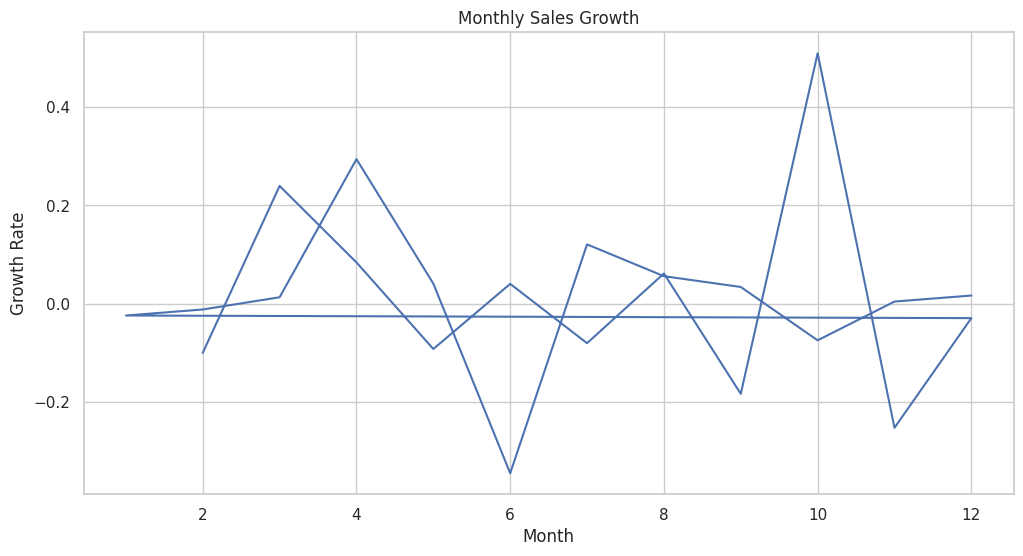

In [ ]:
# Visualize monthly sales growth
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Month'], monthly_revenue['MonthlyGrowth'])
plt.title('Monthly Sales Growth')
plt.xlabel('Month')
plt.ylabel('Growth Rate')
plt.show()

In [ ]:
# Calculated yearly sales growth
yearly_revenue = sales_df.groupby('Year')['Revenue'].sum().reset_index()
yearly_revenue['YearlyGrowth'] = yearly_revenue['Revenue'].pct_change()

# Display the result
yearly_revenue[['Year', 'Revenue', 'YearlyGrowth']]

,Year,Revenue,YearlyGrowth
0,2023,77721512.98,NaN
1,2024,73967551.12,-0.0483


# **Best-performing products and categories.**

In [ ]:
# Identify best-performing products and categories by revenue and units sold.

category_performance = sales_df.groupby('Category')[['Revenue', 'Units Sold']].sum().reset_index()

category_performance

,Category,Revenue,Units Sold
0,Beauty & Personal Care,21273208.29,83893
1,Books,23456977.66,93624
2,Clothing,19885161.07,79539
3,Electronics,24090567.37,92896
4,Home & Kitchen,20427655.15,84673
5,Sports,20222082.26,78220
6,Toys,22333412.30,86254


In [ ]:
product_performance = sales_df.groupby('Product')[['Revenue', 'Units Sold']].sum().reset_index()

product_performance

,Product,Revenue,Units Sold
0,Action Figure,3910249.78,15134
1,Air Purifier,4277607.23,16830
2,Biography,4784389.43,19006
3,Blender,3730829.78,18048
4,Board Game,5753390.10,19608
5,Body Wash,4743746.62,17718
6,Camera,5028792.47,18585
7,Comics,4606661.36,17761
8,Cookware,3989050.94,18543
9,Cricket Bat,2568438.05,10873


In [ ]:
# Sort by performance for insights

top_categories = category_performance.sort_values(by='Revenue', ascending=False).head(5)

top_categories

,Category,Revenue,Units Sold
3,Electronics,24090567.37,92896
1,Books,23456977.66,93624
6,Toys,22333412.30,86254
0,Beauty & Personal Care,21273208.29,83893
4,Home & Kitchen,20427655.15,84673


Top Categories by Revenue:

*  Electronics: 24,090,567.37 (92,896 units sold)

*  Books: 23,456,977.66 (93,624 units sold)

*  Toys: 22,333,412.30 (86,254 units sold)

*  Beauty & Personal Care: 21,273,208.29 (83,893 units sold)

*  Home & Kitchen: 20,427,655.15 (84,673 units sold)

In [ ]:
top_products = product_performance.sort_values(by='Revenue', ascending=False).head(5)

top_products

,Product,Revenue,Units Sold
4,Board Game,5753390.10,19608
20,Laptop,5688927.49,20303
14,Football,5077667.86,18735
6,Camera,5028792.47,18585
29,Smartphone,4899190.49,18899


Top Products by Revenue:

*  Board Game: 5,753,390.10 (19,608 units sold)

*  Laptop: 5,688,927.49 (20,303 units sold)

*  Football: 5,077,667.86 (18,735 units sold)

*  Camera: 5,028,792.47 (18,585 units sold)

*  Smartphone: 4,899,190.49 (18,899 units sold)

# **Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

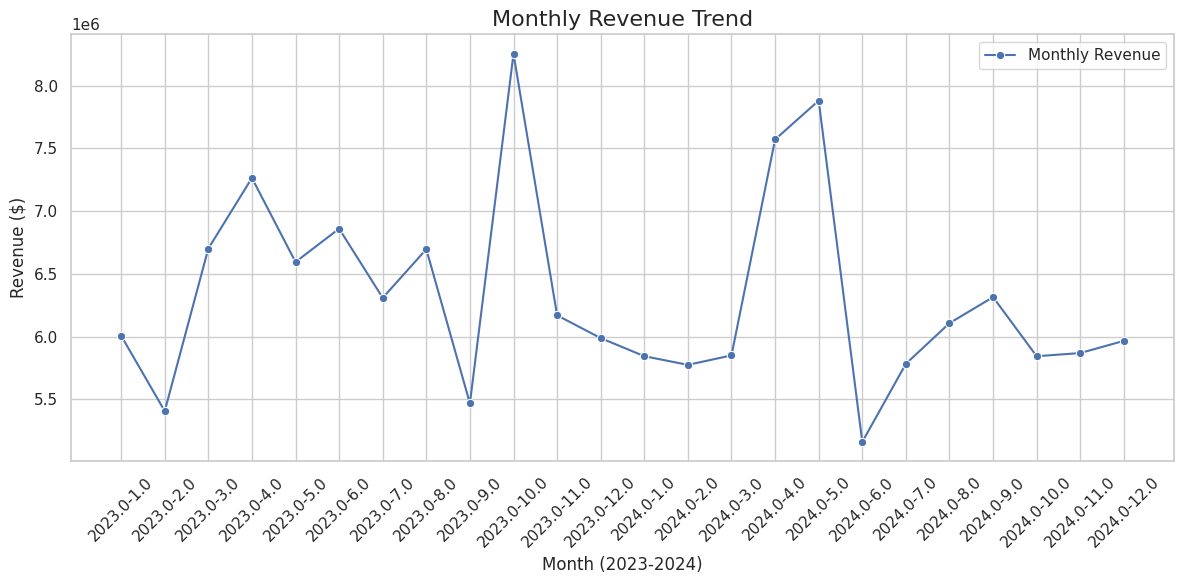

In [ ]:
# Plot monthly sales trends

plt.figure(figsize=(12, 6))

sns.lineplot(data=monthly_revenue, x=monthly_revenue.index, y='Revenue', marker='o', label="Monthly Revenue")

plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month (2023-2024)', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(ticks=monthly_revenue.index, labels=[f"{row['Year']}-{row['Month']:02}" for _, row in monthly_revenue.iterrows()], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

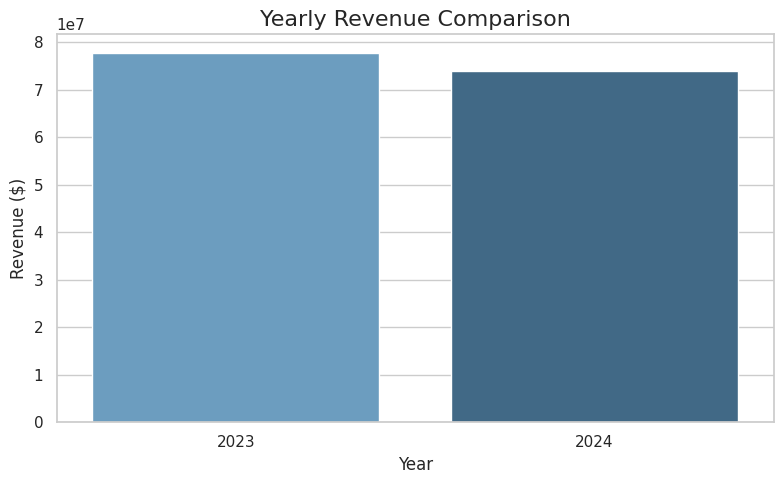

In [ ]:
# Plot yearly sales comparison

plt.figure(figsize=(8, 5))

sns.barplot(data=yearly_revenue, x='Year', y='Revenue', palette="Blues_d")

plt.title('Yearly Revenue Comparison', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.tight_layout()
plt.show()

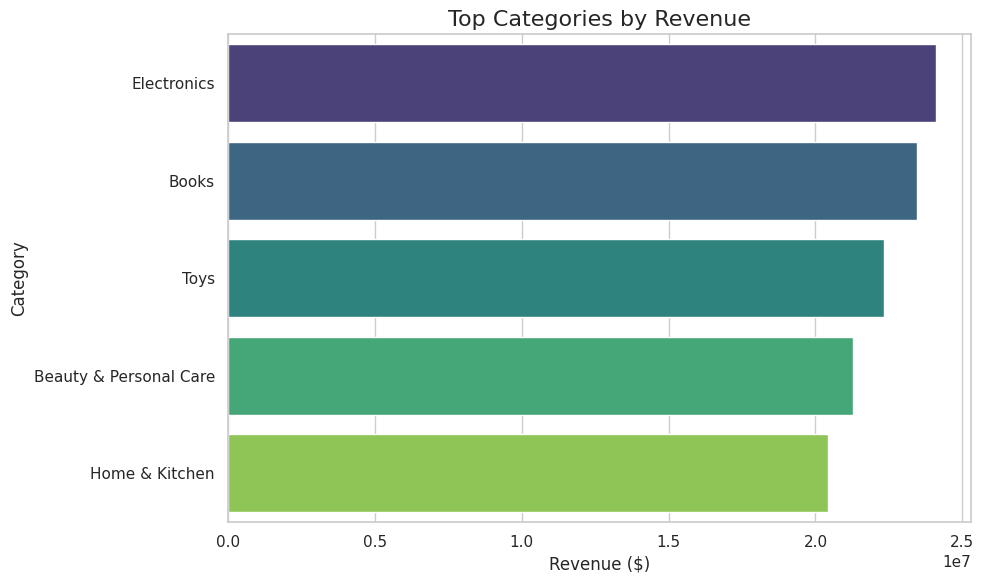

In [ ]:
# Plot top categories by revenue

plt.figure(figsize=(10, 6))

sns.barplot(data=top_categories, y='Category', x='Revenue', palette="viridis")

plt.title('Top Categories by Revenue', fontsize=16)
plt.xlabel('Revenue ($)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()

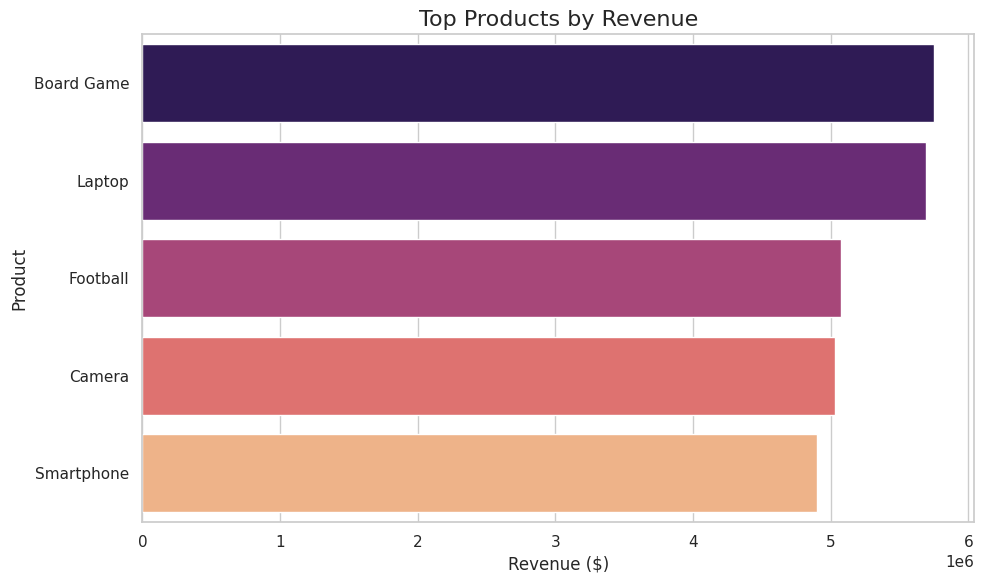

In [ ]:
# Plot top products by revenue

plt.figure(figsize=(10, 6))

sns.barplot(data=top_products, y='Product', x='Revenue', palette="magma")

plt.title('Top Products by Revenue', fontsize=16)
plt.xlabel('Revenue ($)', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.tight_layout()
plt.show()

# **Seasonal trends and their impact on sales.**

Group months into seasons:

*  Winter: December, January, February
   
*  Spring: March, April, May

*  Summer: June, July, August

*  Fall: September, October, November

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

sales_df['Season'] = sales_df['Month'].apply(get_season)

In [ ]:
# Grouped the data by Season and analyze total revenue and units sold.

seasonal_data = sales_df.groupby('Season')[['Revenue', 'Units Sold']].sum().reset_index()

seasonal_data

,Season,Revenue,Units Sold
0,Fall,37919685.31,151075
1,Spring,41864526.11,153562
2,Summer,36917845.82,145849
3,Winter,34987006.86,148613


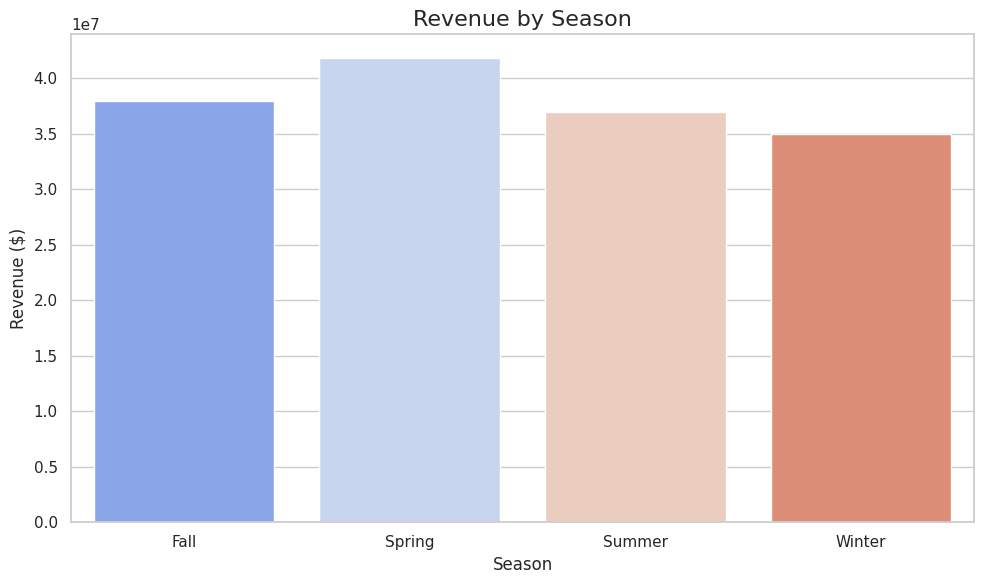

In [ ]:
# Use bar plots to visualize revenue and units sold across seasons.

plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_data, x='Season', y='Revenue', palette='coolwarm')
plt.title('Revenue by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.tight_layout()
plt.show()

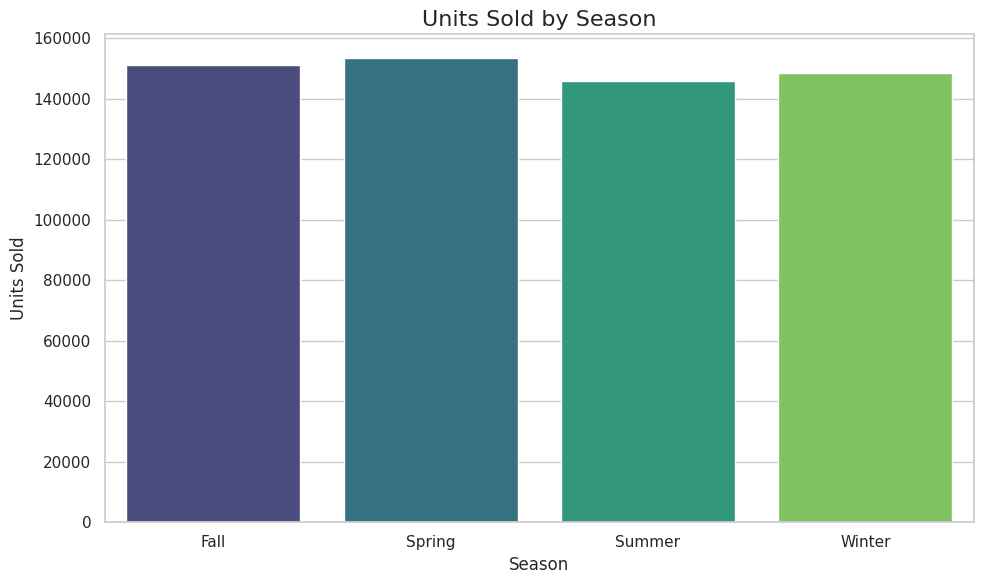

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_data, x='Season', y='Units Sold', palette='viridis')
plt.title('Units Sold by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Analyzing Category-Level Trends.

category_seasonal = sales_df.groupby(['Season', 'Category'])[['Revenue', 'Units Sold']].sum().reset_index()

category_seasonal

,Season,Category,Revenue,Units Sold
0,Fall,Beauty & Personal Care,5830119.31,20945
1,Fall,Books,5224765.80,24303
2,Fall,Clothing,4735709.99,20045
3,Fall,Electronics,6782895.00,23971
4,Fall,Home & Kitchen,4903515.91,19737
5,Fall,Sports,4772716.79,18475
6,Fall,Toys,5669962.51,23599
7,Spring,Beauty & Personal Care,5911540.59,22891
8,Spring,Books,7569517.62,25590
9,Spring,Clothing,4497845.38,18562


In [ ]:
category_seasonal_pivot = category_seasonal.pivot(index='Season', columns='Category', values='Revenue').reset_index()

category_seasonal_pivot

Category,Season,Beauty & Personal Care,Books,Clothing,Electronics,Home & Kitchen,Sports,Toys
0,Fall,5830119.31,5224765.80,4735709.99,6782895.00,4903515.91,4772716.79,5669962.51
1,Spring,5911540.59,7569517.62,4497845.38,7109833.55,5385054.14,5558033.17,5832701.66
2,Summer,4679125.92,5443700.28,5334925.49,5078567.02,5211002.71,4734183.92,6436340.48
3,Winter,4852422.47,5218993.96,5316680.21,5119271.80,4928082.39,5157148.38,4394407.65


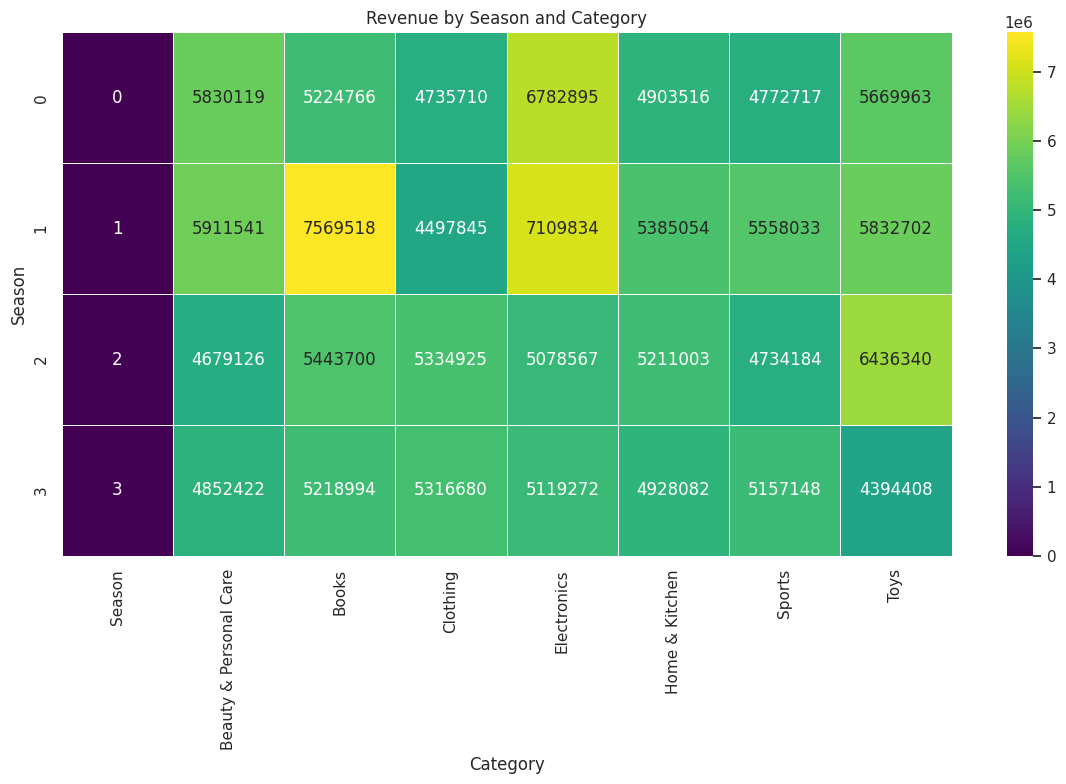

In [ ]:
# Converted 'Season' column to category type and then to numeric codes
category_seasonal_pivot['Season'] = pd.Categorical(category_seasonal_pivot['Season']).codes

# plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(category_seasonal_pivot, annot=True, fmt=".0f", cmap="viridis", linewidths=.5)
plt.title('Revenue by Season and Category')
plt.xlabel('Category')
plt.ylabel('Season')
plt.tight_layout()
plt.show()

In [ ]:
# Analyzing Product-Level Trends.

product_seasonal = sales_df.groupby(['Season', 'Product'])[['Revenue', 'Units Sold']].sum().reset_index()

product_seasonal

,Season,Product,Revenue,Units Sold
0,Fall,Action Figure,658922.60,3007
1,Fall,Air Purifier,1585019.77,5548
2,Fall,Biography,1102376.70,4828
3,Fall,Blender,659828.96,4042
4,Fall,Board Game,1491135.75,5139
...,...,...,...,...
135,Winter,Smartwatch,597698.95,3739
136,Winter,T-Shirt,959952.60,3686
137,Winter,Tennis Racket,813395.83,3900
138,Winter,Vacuum Cleaner,764247.65,3217


In [ ]:
product_seasonal_pivot = product_seasonal.pivot(index='Season', columns='Product', values='Revenue').reset_index()

product_seasonal_pivot

Product,Season,Action Figure,Air Purifier,Biography,Blender,Board Game,Body Wash,Camera,Comics,Cookware,...,Remote Car,Science,Shampoo,Shoes,Smartphone,Smartwatch,T-Shirt,Tennis Racket,Vacuum Cleaner,Yoga Mat
0,Fall,658922.60,1585019.77,1102376.70,659828.96,1491135.75,1590613.11,1640792.82,601956.93,993632.14,...,1031740.66,1483147.30,966656.13,853464.13,1695685.43,1151410.94,1144334.84,515126.62,807025.03,1121301.52
1,Spring,1209343.41,879654.17,2211146.09,1136777.47,1822683.85,969750.89,1101131.93,1202450.83,928689.38,...,727370.63,1287577.05,1576087.22,811569.69,1289987.12,1455309.16,261823.71,1318098.95,1126304.87,1203117.98
2,Summer,1269775.16,1064792.12,671077.47,866459.91,1494750.20,1349651.69,1260283.63,1306081.79,1001656.14,...,1057469.10,1141911.72,958986.98,918227.18,824420.30,1066851.30,1451309.82,1567986.02,1328108.46,557657.82
3,Winter,772208.61,748141.17,799789.17,1067763.44,944820.30,833730.93,1026584.09,1496171.81,1065073.28,...,887604.40,974511.11,562522.69,1385940.65,1089097.64,597698.95,959952.60,813395.83,764247.65,1086340.50


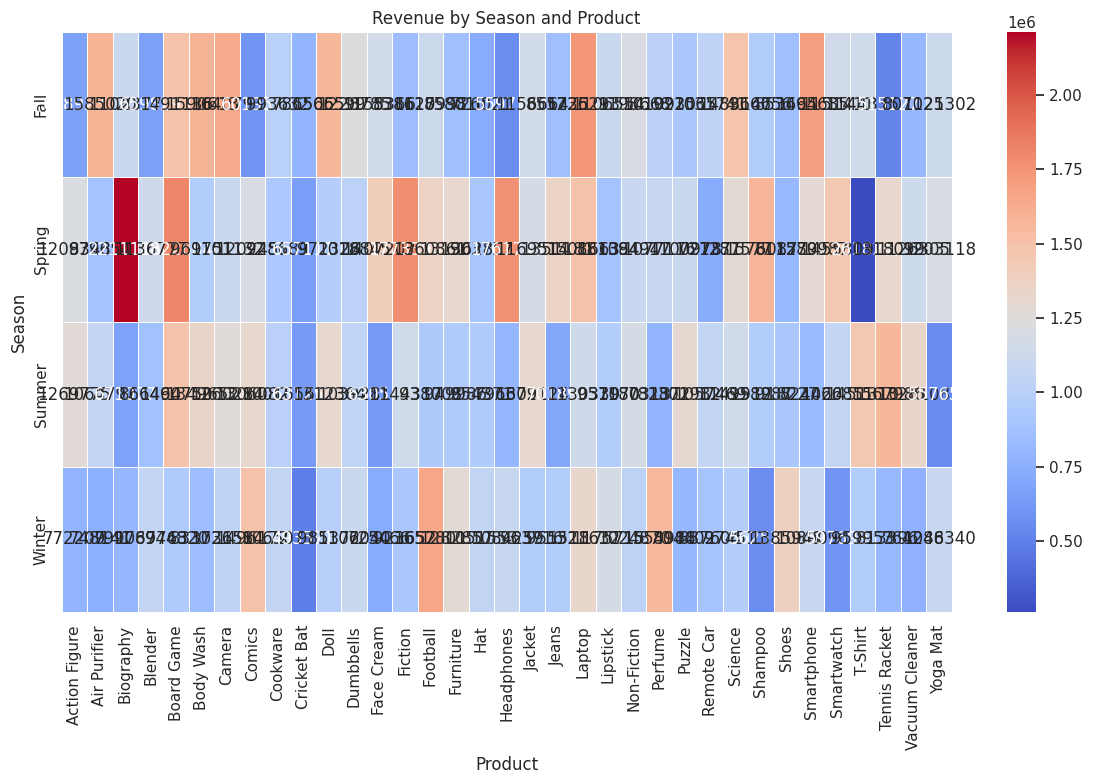

In [ ]:
product_seasonal_pivot = product_seasonal.pivot(index='Season', columns='Product', values='Revenue') # Remove reset_index()

plt.figure(figsize=(12, 8))
sns.heatmap(product_seasonal_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=.5)
plt.title('Revenue by Season and Product')
plt.xlabel('Product')
plt.ylabel('Season')
plt.tight_layout()
plt.show()

# **Regression Analysis for Revenue Prediction**

In [ ]:
# Feature Engineering

def get_season(month):
  sales_df['Season'] = sales_df['Month'].apply(get_season)
  encoded_data = pd.get_dummies(sales_df, columns=['Category', 'Product', 'Season'], drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

encoded_data = pd.get_dummies(sales_df, columns=['Category', 'Product', 'Season'], drop_first=True)

# Split Data
X = encoded_data.drop(columns=['Revenue'])
y = encoded_data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate
predictions = model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, predictions)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, predictions)}")

R2 Score: 0.6757996108237856
Mean Squared Error: 934021385.9145826


# **Clustering**

In [ ]:
# Feature Selection.
from sklearn.preprocessing import StandardScaler

features = sales_df[['Revenue', 'Units Sold']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

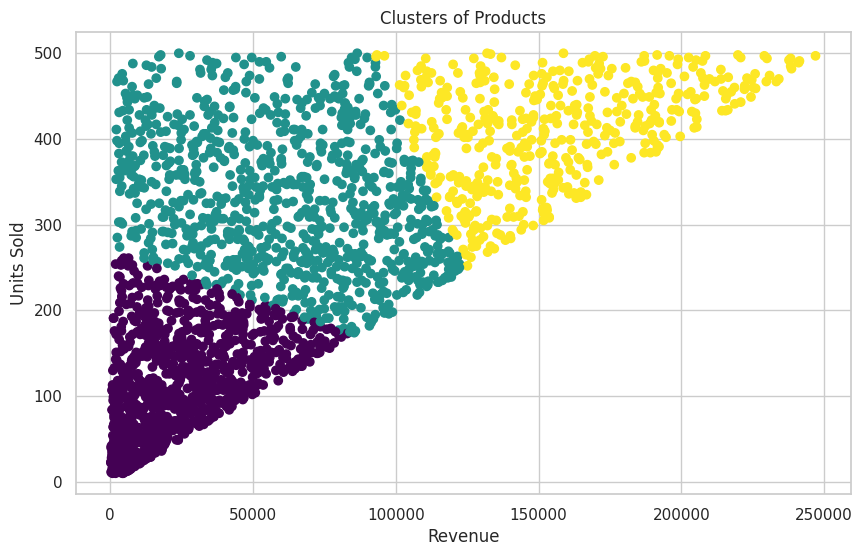

In [ ]:
from sklearn.cluster import KMeans

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
sales_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(features['Revenue'], features['Units Sold'], c=sales_df['Cluster'], cmap='viridis')
plt.xlabel('Revenue')
plt.ylabel('Units Sold')
plt.title('Clusters of Products')
plt.show()

**Time Series Decomposition**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregate Revenue by Month
monthly_revenue = sales_df.groupby(['Year', 'Month'])['Revenue'].sum().reset_index()
monthly_revenue['Date'] = pd.to_datetime(monthly_revenue[['Year', 'Month']].assign(Day=1))

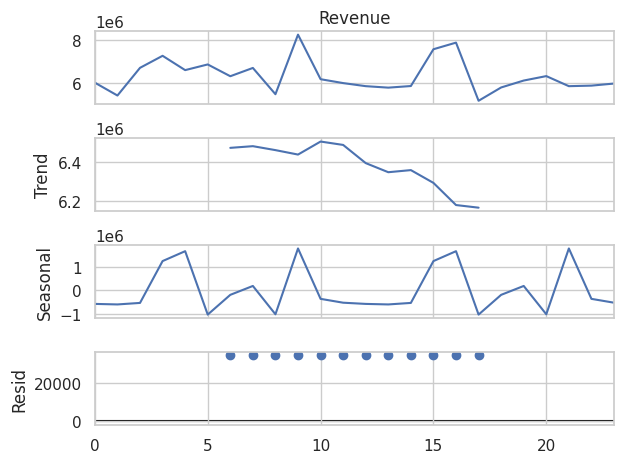

In [ ]:
# Decompose Time Series.
decomposition = seasonal_decompose(monthly_revenue['Revenue'], period=12, model='additive')
decomposition.plot()
plt.show()

# **Recommendations to improve sales performance.**

---



**Capitalize on Top Categories**

Observation: Categories like Electronics, Books, and Toys generate the highest revenue.

Recommendation:
*  Allocate more inventory and marketing budget to these categories.
*  Create bundled offers (e.g., "Buy a smartphone, get a case at 50% off").
*  Launch seasonal campaigns focusing on these popular categories.

**Seasonal Promotions**

Observation: Revenue spikes during specific months or seasons.

Recommendation:
*  Offer discounts and promotions before or during high-revenue seasons (e.g., back-to-school sales for Books or Electronics).
*  Use predictive analytics to stock seasonal items (e.g., Toys during the holiday season).
*  Focus on slower seasons by offering discounts or limited-time offers to drive demand.

**Boost Product-Specific Marketing**

Observation: Top products like Board Games, Laptops, and Smartphones dominate revenue.
Recommendation:
*  Invest in targeted ads or promotions for these products.
*  Collaborate with influencers or create product-specific content to boost visibility.
*  Expand the range of accessories or add-ons for these high-performing items (e.g., laptop bags, smartphone cases).

**Enhance Customer Retention**

Observation: Repeat customers are often the most valuable.

Recommendation:
*  Introduce a loyalty program with rewards for frequent purchases.
*  Send personalized recommendations based on purchase history.
*  Offer early access to sales for loyal customers.

**Focus on Underperforming Products**

Observation: Some products may have low sales.

Recommendation:
*  Reevaluate pricing or marketing for underperforming items.
*  Consider discontinuing slow-moving products and reallocating resources to high-performing ones.
*  Gather customer feedback to identify reasons for low performance.

**Optimize Digital Presence**

Observation: Online visibility plays a crucial role in sales growth.

Recommendation:
*  Improve website speed and mobile experience for e-commerce platforms.
*  Optimize product listings with better descriptions, images, and videos.
*  Use data-driven retargeting ads for abandoned carts.

**Leverage Data Analytics**

Observation: Insights from data drive smarter decisions.

Recommendation:
*  Use sales data to forecast demand and plan inventory.
*  Identify geographic regions with higher sales and focus advertising in those areas.
*  Track the performance of marketing campaigns to optimize ROI.

---

In [133]:
# Data Export.

sales_df.to_csv('sales_data_for_report.csv', index=False)
print("Data exported successfully.")

Data exported successfully.
